# Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input - string = “write write write all the number from from from 1 to 100”

Example output - 5

Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
def highest_frequency(string):
    # Split the string into words
    words = string.split()
    
    #Create the dict to store words
    word_frequency = {}
    
    # Count the frequency of each word
    for i in words:
        if i in word_frequency:
            word_frequency[i] += 1
        else:
            word_frequency[i] = 1
            
    #find the max frequency
    max_frequency = max(word_frequency.values())
    
    #find length
    
    for i,j in word_frequency.items():
        if j == max_frequency:
            return len(i)  

In [2]:
highest_frequency("Deepak Deepak Deepak kumar kumar kumar kumar write a code")

5

# Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .
 

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }

Example output 1- YES

Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO


In [3]:
from collections import Counter
def valid_string(s):
    count_frequency = Counter(s)
    
    #Find The frequency
    frequency = set(count_frequency.values())
    
    # If all frequencies are the same, the string is valid
    if len(frequency) == 1:
        return "Yes"
    
    else:
        return "No"


In [4]:
print(valid_string("aabbcc"))
print(valid_string("aabbcdd"))

Yes
No


# Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

Note - Write comments wherever necessary explaining the code written.

In [27]:
import pandas as pd
import requests

def convert_in_to_csv_format(link,filename):
    # Download the data from the provided link
    response = requests.get(link)
    data = response.json()
    data = data["pokemon"]
    new_data = pd.DataFrame(data)
    new_data.to_csv(filename,index=False)
    
    return new_data
pokemon = convert_in_to_csv_format("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json","pokemon.csv")

# Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

Link - https://data.nasa.gov/resource/y77d-th95.json

Note - Write code comments wherever needed for code understanding.

In [6]:
def fatch_data_from_url(link):
    # Download the data from the provided link
    response = requests.get(link)
    #use request to pull from url
    data = response.json()
    return data
data = fatch_data_from_url("https://data.nasa.gov/resource/y77d-th95.json")
df = pd.DataFrame(data)
df.drop([":@computed_region_cbhk_fwbd",":@computed_region_nnqa_25f4","id","fall","reclat","reclong"],axis=1,inplace=True)
df.to_csv("meteorite.scv",index=False)

# Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Note - Write proper code comments wherever needed for the code understanding

In [7]:
def fatch_data_from_url(link):
    # Download the data from the provided link
    response = requests.get(link)
    #use request to pull from url
    data = response.json()
    return data
data = fatch_data_from_url("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")

In [8]:
data

{'id': 1371,
 'url': 'https://www.tvmaze.com/shows/1371/westworld',
 'name': 'Westworld',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Drama', 'Science-Fiction', 'Western'],
 'status': 'Ended',
 'runtime': 60,
 'averageRuntime': 63,
 'premiered': '2016-10-02',
 'ended': '2022-08-14',
 'officialSite': 'http://www.hbo.com/westworld',
 'schedule': {'time': '21:00', 'days': ['Sunday']},
 'rating': {'average': 8.2},
 'weight': 99,
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'},
  'officialSite': 'https://www.hbo.com/'},
 'webChannel': None,
 'dvdCountry': None,
 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'},
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg',
  'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'},
 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artifici

# Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions 
Note 1.Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities

<Axes: title={'center': 'Get all Pokemons whose spawn rate is less than 5%'}, xlabel='name', ylabel='avg_spawns'>

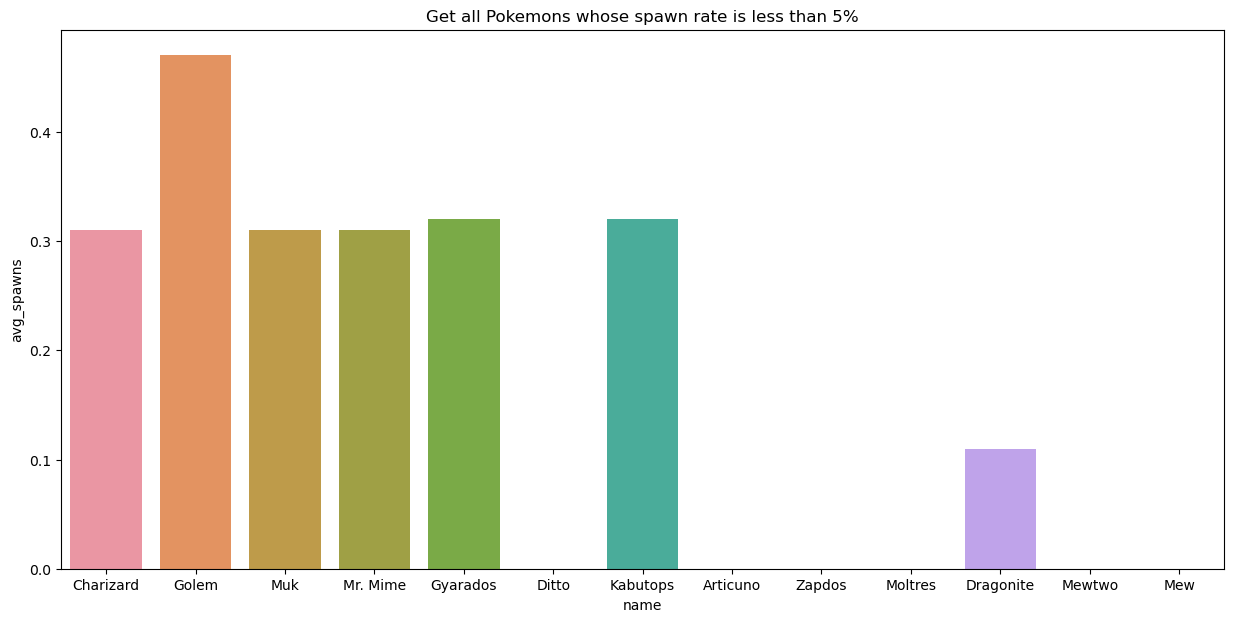

In [28]:
# for  better visualizations use matplotlib and seaborn
import ast
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("pokemon.csv")
data.head()
less_spawn = data[data["avg_spawns"] < 0.5]
plt.figure(figsize=(15,7))
plt.title("Get all Pokemons whose spawn rate is less than 5%")
sns.barplot(x = "name",y="avg_spawns",data=less_spawn)

In [29]:
# Get all Pokemons that have less than 4 weaknesses
# use ast liabery to convert in string to list and then fatch the len for wekness less then 4
data["weaknesses"] = data["weaknesses"].apply(ast.literal_eval)
weknessless4 = data[data['weaknesses'].apply(lambda x: len(x) < 4)]
weknessless4.loc[:,["name","weaknesses"]]

,name,weaknesses
3,Charmander,"[Water, Ground, Rock]"
4,Charmeleon,"[Water, Ground, Rock]"
5,Charizard,"[Water, Electric, Rock]"
6,Squirtle,"[Electric, Grass]"
7,Wartortle,"[Electric, Grass]"
...,...,...
145,Moltres,"[Water, Electric, Rock]"
146,Dratini,"[Ice, Dragon, Fairy]"
147,Dragonair,"[Ice, Dragon, Fairy]"
149,Mewtwo,"[Bug, Ghost, Dark]"


In [30]:
# Get all Pokemons that have no multipliers at all
data["multipliers"] = data["multipliers"].str.extract(r'\[([\d.]+)\]').astype(float)
no_multipliers = data[data["multipliers"].isnull()]
no_multipliers.loc[:,["name","multipliers"]]

,name,multipliers
1,Ivysaur,NaN
2,Venusaur,NaN
5,Charizard,NaN
8,Blastoise,NaN
10,Metapod,NaN
...,...,...
145,Moltres,NaN
146,Dratini,NaN
148,Dragonite,NaN
149,Mewtwo,NaN


In [31]:
# Get all Pokemons that do not have more than 2 evolutions
evolution = data["next_evolution"].dropna().apply(ast.literal_eval).apply(lambda x: [evolution['name'] for evolution in x])

In [32]:
for i in evolution:
    if len(i) <=2:
        print(i)

['Ivysaur', 'Venusaur']
['Venusaur']
['Charmeleon', 'Charizard']
['Charizard']
['Wartortle', 'Blastoise']
['Blastoise']
['Metapod', 'Butterfree']
['Butterfree']
['Kakuna', 'Beedrill']
['Beedrill']
['Pidgeotto', 'Pidgeot']
['Pidgeot']
['Raticate']
['Fearow']
['Arbok']
['Raichu']
['Sandslash']
['Nidorina', 'Nidoqueen']
['Nidoqueen']
['Nidorino', 'Nidoking']
['Nidoking']
['Clefable']
['Ninetales']
['Wigglytuff']
['Golbat']
['Gloom', 'Vileplume']
['Vileplume']
['Parasect']
['Venomoth']
['Dugtrio']
['Persian']
['Golduck']
['Primeape']
['Arcanine']
['Poliwhirl', 'Poliwrath']
['Poliwrath']
['Kadabra', 'Alakazam']
['Alakazam']
['Machoke', 'Machamp']
['Machamp']
['Weepinbell', 'Victreebel']
['Victreebel']
['Tentacruel']
['Graveler', 'Golem']
['Golem']
['Rapidash']
['Slowbro']
['Magneton']
['Dodrio']
['Dewgong']
['Muk']
['Cloyster']
['Haunter', 'Gengar']
['Gengar']
['Hypno']
['Kingler']
['Electrode']
['Exeggutor']
['Marowak']
['Weezing']
['Rhydon']
['Seadra']
['Seaking']
['Starmie']
['Gyarados']

In [33]:
# Get all Pokemons whose spawn time is less than 300 seconds.
data["spawn_time"] = pd.to_datetime(data["spawn_time"],format='%H:%M')
threshold = pd.Timedelta(seconds=300)
spawn_time = data[data['spawn_time'].diff() < threshold]
spawn_time.loc[:,["name"]]

,name
1,Ivysaur
3,Charmander
5,Charizard
6,Squirtle
8,Blastoise
...,...
136,Porygon
138,Omastar
139,Kabuto
141,Aerodactyl


# Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [15]:
# Get all the Earth meteorites that fell before the year 2000
data = pd.read_csv("meteorite.scv")
data["year"] = data["year"].astype(str)
data["year"] = data["year"].apply(lambda x:x.split("-")[0])
year = data[data["year"].astype(float) < 2000]
year.loc[:,["name","year"]]

,name,year
0,Aachen,1880
1,Aarhus,1951
2,Abee,1952
3,Acapulco,1976
4,Achiras,1902
...,...,...
994,Timochin,1807
995,Tirupati,1934
997,Tjabe,1869
998,Tjerebon,1922


In [16]:
# Get all the earth meteorites co-ordinates who fell before the year 1970
data.dropna(inplace=True)
data["geolocation"] = data["geolocation"].apply(ast.literal_eval)
data['coordinates'] = data["geolocation"].apply(lambda x: x['coordinates'])
beforetheyear1970 = data[data["year"].astype(float) < 1970]
beforetheyear1970.loc[:,["year","coordinates"]]

,year,coordinates
0,1880,"[6.08333, 50.775]"
1,1951,"[10.23333, 56.18333]"
2,1952,"[-113, 54.21667]"
4,1902,"[-64.95, -33.16667]"
5,1919,"[71.8, 32.1]"
...,...,...
994,1807,"[35.2, 54.5]"
995,1934,"[79.41667, 13.63333]"
997,1869,"[111.53333, -7.08333]"
998,1922,"[106.58333, -6.66667]"


In [17]:
beforetheyear1970.loc[:,["year","coordinates"]]

,year,coordinates
0,1880,"[6.08333, 50.775]"
1,1951,"[10.23333, 56.18333]"
2,1952,"[-113, 54.21667]"
4,1902,"[-64.95, -33.16667]"
5,1919,"[71.8, 32.1]"
...,...,...
994,1807,"[35.2, 54.5]"
995,1934,"[79.41667, 13.63333]"
997,1869,"[111.53333, -7.08333]"
998,1922,"[106.58333, -6.66667]"


In [18]:
# Assuming that the mass of the earth meteorites was in kg, get all those whose mass was morethan 10000kg
mass = data[data["mass"] > 10000]
mass.loc[:,["name","mass"]]

,name,mass
2,Abee,107000.0
7,Agen,30000.0
11,Aïr,24000.0
16,Akyumak,50000.0
27,Alfianello,228000.0
...,...,...
991,Tieschitz,28000.0
992,Tilden,74800.0
994,Timochin,65500.0
997,Tjabe,20000.0


# Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

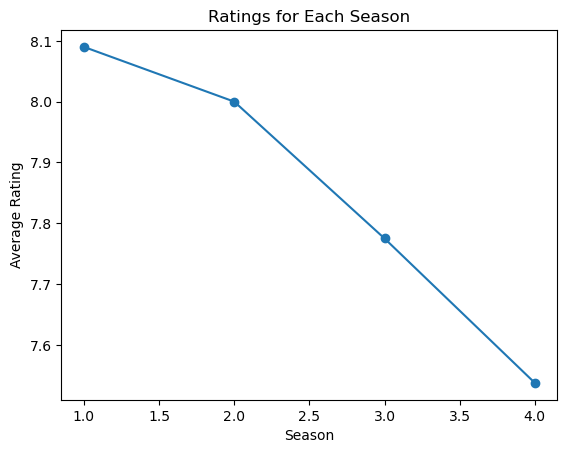

Season 1 highly rated episodes: Trompe L'Oeil, The Well-Tempered Clavier, The Bicameral Mind
Season 2 highly rated episodes: Kiksuya, Vanishing Point, The Passenger
Episodes aired before May 2019: ['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']
Highest rated episode in Season 1: The Bicameral Mind
Lowest rated episode in Season 1: The Stray
Highest rated episode in Season 2: Kiksuya
Lowest rated episode in Season 2: Akane No Mai
Highest rated episode in Season 3: Parce Domine
Lowest rated episode in Season 3: Decoherence
Highest rated episode in Season 4: Zhuangzi
Lowest rated episode in Season 4: The Auguries
Summary for the most popular episode in Season 1:
<p>Delores finds out the tru

In [36]:
import requests
import matplotlib.pyplot as plt

# Fetch data from the API
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")
data = response.json()

# Get all episodes
episodes = data["_embedded"]["episodes"]

# Get all the overall ratings for each season
season_ratings = {}
for episode in episodes:
    season = episode["season"]
    rating = float(episode["rating"]["average"])
    if season in season_ratings:
        season_ratings[season].append(rating)
    else:
        season_ratings[season] = [rating]

# Plot the ratings for each season
seasons = sorted(season_ratings.keys())
average_ratings = [sum(season_ratings[season]) / len(season_ratings[season]) for season in seasons]
plt.plot(seasons, average_ratings, marker='o')
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Ratings for Each Season")
plt.show()

# Get all the episode names with average ratings > 8 for every season
highly_rated_episodes = {}
for episode in episodes:
    season = episode["season"]
    episode_name = episode["name"]
    rating = float(episode["rating"]["average"])
    if rating > 8:
        if season in highly_rated_episodes:
            highly_rated_episodes[season].append(episode_name)
        else:
            highly_rated_episodes[season] = [episode_name]

# Print the episode names with average ratings > 8 for every season
for season in highly_rated_episodes:
    print(f"Season {season} highly rated episodes: {', '.join(highly_rated_episodes[season])}")

# Get all the episode names that aired before May 2019
episodes_before_2019 = [episode["name"] for episode in episodes if episode["airdate"] < "2019-05"]

# Print the episode names that aired before May 2019
print("Episodes aired before May 2019:", episodes_before_2019)

# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = {}
lowest_rated_episodes = {}
for episode in episodes:
    season = episode["season"]
    episode_name = episode["name"]
    rating = float(episode["rating"]["average"])
    if season in highest_rated_episodes:
        if rating > float(highest_rated_episodes[season][1]):
            highest_rated_episodes[season] = (episode_name, rating)
        if rating < float(lowest_rated_episodes[season][1]):
            lowest_rated_episodes[season] = (episode_name, rating)
    else:
        highest_rated_episodes[season] = (episode_name, rating)
        lowest_rated_episodes[season] = (episode_name, rating)

# Print the episode with the highest and lowest rating for each season
for season in highest_rated_episodes:
    print(f"Highest rated episode in Season {season}: {highest_rated_episodes[season][0]}")
    print(f"Lowest rated episode in Season {season}: {lowest_rated_episodes[season][0]}")

# Get the summary for the most popular (highest rated) episode in every season
most_popular_episodes = {}
for episode in episodes:
    season = episode["season"]
    episode_name = episode["name"]
    rating = float(episode["rating"]["average"])
    if season in most_popular_episodes:
        if rating > float(most_popular_episodes[season][1]):
            most_popular_episodes[season] = (episode_name, rating, episode["summary"])
    else:
        most_popular_episodes[season] = (episode_name, rating, episode["summary"])

# Print the summary for the most popular episode in every season
for season in most_popular_episodes:
    print(f"Summary for the most popular episode in Season {season}:")
    print(most_popular_episodes[season][2])


# Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -

1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after
2015

● Draw plots to show the distribution between city and electric vehicle type

In [20]:
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [21]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
Noteligible = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not eligible due to low battery range']
Noteligible.loc[:,["Make","Clean Alternative Fuel Vehicle (CAFV) Eligibility"]]

,Make,Clean Alternative Fuel Vehicle (CAFV) Eligibility
6,FORD,Not eligible due to low battery range
7,AUDI,Not eligible due to low battery range
8,FORD,Not eligible due to low battery range
14,FORD,Not eligible due to low battery range
15,KIA,Not eligible due to low battery range
...,...,...
130377,BMW,Not eligible due to low battery range
130385,AUDI,Not eligible due to low battery range
130390,JEEP,Not eligible due to low battery range
130407,TOYOTA,Not eligible due to low battery range


In [22]:
# Get all TESLA cars with the model year, and model type made in Bothell City
city = data[(data["Make"] == "TESLA") &(data["Model Year"]) & (data["Electric Vehicle Type"])&(data["City"] == "Bothell")] 
city.loc[:,["City","Model Year","Make","Electric Vehicle Type"]]

,City,Model Year,Make,Electric Vehicle Type
292,Bothell,2017,TESLA,Battery Electric Vehicle (BEV)
495,Bothell,2021,TESLA,Battery Electric Vehicle (BEV)
503,Bothell,2023,TESLA,Battery Electric Vehicle (BEV)
579,Bothell,2021,TESLA,Battery Electric Vehicle (BEV)
776,Bothell,2023,TESLA,Battery Electric Vehicle (BEV)
...,...,...,...,...
129392,Bothell,2021,TESLA,Battery Electric Vehicle (BEV)
129508,Bothell,2021,TESLA,Battery Electric Vehicle (BEV)
129665,Bothell,2013,TESLA,Battery Electric Vehicle (BEV)
129778,Bothell,2019,TESLA,Battery Electric Vehicle (BEV)


In [23]:
# Get all the cars that have an electric range of more than 100, and were made after2015
el = data[(data["Electric Range"] > 100)& (data["Model Year"] > 2015)]
el.loc[:,["Make","Electric Range","Model Year"]]

,Make,Electric Range,Model Year
0,TESLA,238,2018
2,TESLA,220,2019
4,TESLA,210,2017
12,TESLA,308,2020
13,TESLA,322,2020
...,...,...,...
130417,TESLA,291,2020
130428,NISSAN,151,2018
130432,TESLA,291,2020
130436,TESLA,215,2018


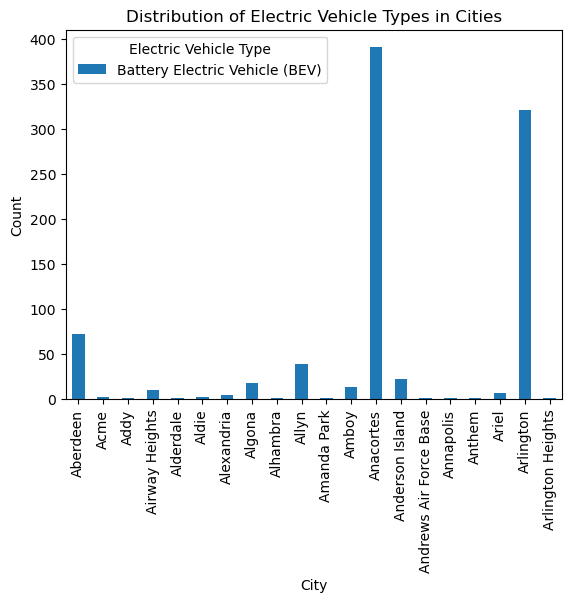

In [24]:
# Draw plots to show the distribution between city and electric vehicle type
ElectricVehicle = data[data["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"]
elv =  ElectricVehicle.loc[:,["City","Electric Vehicle Type"]]
import matplotlib.pyplot as plt

# Group the data by City and Electric Vehicle Type and count the occurrences
counts = elv.groupby(['City', 'Electric Vehicle Type']).size().unstack()[:20]

# Create a bar plot
counts.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types in Cities')
plt.legend(title='Electric Vehicle Type')
plt.show()

# Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.

Note -

1. Write code comments wherever required for code

2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [25]:
import re

def count_pos_tags(text):
    # Count verbs
    verbs = re.findall(r'\b\w+ing\b|\b\w+ed\b|\b\w+s\b', text)
    verb_count = len(verbs)
    
    # Count nouns
    nouns = re.findall(r'\b\w+s\b|\b\w+[^inged]s\b|\b\w+[^ing]ing\b|\b\w+ed\b', text)
    noun_count = len(nouns)
    
    # Count pronouns
    pronouns = re.findall(r'\b(?:he|she|it|they|we|you|I|me|him|her|us|them)\b', text, re.IGNORECASE)
    pronoun_count = len(pronouns)
    
    # Count adjectives
    adjectives = re.findall(r'\b\w+ful\b|\b\w+ous\b|\b\w+ish\b|\b\w+ive\b', text)
    adjective_count = len(adjectives)
    
    # Create a dictionary with the counts
    pos_counts = {
        'Verbs': verb_count,
        'Nouns': noun_count,
        'Pronouns': pronoun_count,
        'Adjectives': adjective_count
    }
    
    return pos_counts

# Test case 1: Counting POS tags in a phrase
phrase = "The quick brown fox jumps over the lazy dog"
result1 = count_pos_tags(phrase)
print(result1)

# Test case 2: Counting POS tags in a paragraph
paragraph = "The cat is sleeping on the mat. It looks very comfortable. The mat is soft and fluffy."
result2 = count_pos_tags(paragraph)
print(result2)


{'Verbs': 1, 'Nouns': 1, 'Pronouns': 0, 'Adjectives': 0}
{'Verbs': 4, 'Nouns': 4, 'Pronouns': 1, 'Adjectives': 0}
